#Identify the Days with highest and lowest standard deviation of records. 
#How consistent is patient activity across different days?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#Variables
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
#modified_demographic_path = path+"DEMOGRAPHIC.csv"
#patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"

In [4]:
patients_df = pd.read_csv(all_patients_path, parse_dates=["time"])
patients_df.columns
#dt_u = patients_df["time"].dt.date.unique()
#print(len(dt_u))
#patients_df.head()
patients_df["glucose"].head()
patients_df["glucose"] = patients_df["glucose"].round(1)
patients_df["glucose"].head()



0    332.0
1    326.0
2    330.0
3    324.0
4    306.0
Name: glucose, dtype: float64

**What is the average glucose level for patients between midnight and 5 AM?**

In [241]:
id_lst = patients_df["patient_id"].unique()
print(len(patients_df))
early_morning_df  = patients_df[(patients_df["time"].dt.hour >=0) & (patients_df["time"].dt.hour<5)].copy()
early_morning_df.columns
early_morning_df.head()
#early_morning_df['time'] = early_morning_df['time'].dt.date
#early_morning_df.head()
#result = early_morning_df.groupby(['patient_id','time']).size()
#print(result)
#result[result['patient_id']=='HUPA0001P']
#print(result)
#early_morning_df.head()
#lst = early_morning_df['patient_id'].unique()
#dtl = early_morning_df['time'].dt.date.unique()
#early_morning_df.loc[:,['patient_id','time','glucose']] = 
#perp = early_morning_df.groupby(['patient_id', early_morning_df['time'].dt.date])[['patient_id','glucose','time']].mean()
#perp.head()
#print(len(early_morning_df))
#print(early_morning_df.loc[early_morning_df["glucose"]>0,["glucose","carb_input","basal_rate"]])
#avg_glucose = early_morning_df["glucose"].mean()
#print(avg_glucose)
#avg_glucose_per_patient = early_morning_df.groupby("patient_id")["glucose"].mean()
#print(avg_glucose_per_patient)

309392


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input,patient_id
64,2018-06-14 00:00:00,117.0,4.0250,84.100000,0.0,0.000000,0.0,0.0,HUPA0001P
65,2018-06-14 00:05:00,158.0,4.1055,83.018018,0.0,0.000000,0.0,0.0,HUPA0001P
66,2018-06-14 00:10:00,160.0,4.1055,84.719626,0.0,0.000000,0.0,0.0,HUPA0001P
67,2018-06-14 00:15:00,126.0,4.1055,84.447368,0.0,0.000000,0.0,0.0,HUPA0001P
68,2018-06-14 00:20:00,164.0,4.1055,84.036364,0.0,0.070833,0.0,0.0,HUPA0001P


In [244]:
early_morning_df  = patients_df[(patients_df["time"].dt.hour >=0) & (patients_df["time"].dt.hour<5)].copy()
early_morning_df.head()
print(len(early_morning_df))

64250


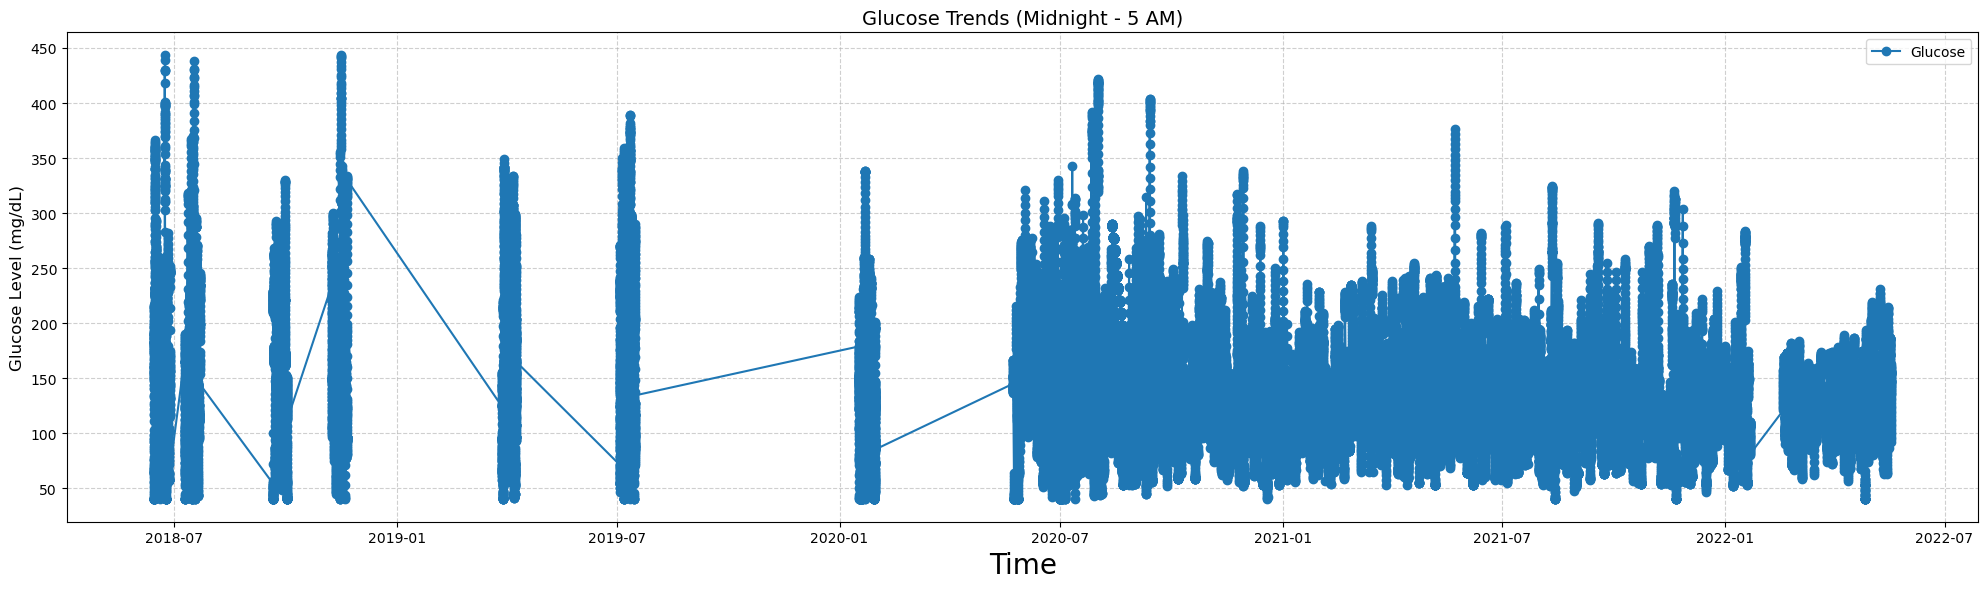

In [250]:
early_morning_df  = patients_df[(patients_df["time"].dt.hour >=0) & (patients_df["time"].dt.hour<5)].copy()

plt.figure(figsize=(20,6))
#for pid,group in early_morning_df.groupby("patient_id"):
#plt.plot(group["time"],group["glucose"], marker="o", linestyle="-", lable =pid)
plt.plot(early_morning_df["time"], early_morning_df["glucose"],label="Glucose",marker="o")
plt.title("Glucose Trends (Midnight - 5 AM)", fontsize=14)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Glucose Level (mg/dL)", fontsize=12)
#plt.legend(Title="Patient_Id", bbox_to_anchor=(1.05,1),loc="upper_left")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

**Problem Statement : Compare overnight and daytime glucose levels across patients**

**Reasoning: Overnight (midnight–5 AM) glucose reflects basal insulin and fasting state. 
             and Daytime glucose is influenced by meals,activity,stress and bolus insulin.
             Comparing these two periods helps clinical assess whether insulin delivery(basal/bolus) or                          lifestyle modificiations like diet,exercise are effective**


In [213]:
#pd.set_option("display.max_rows", None) 
print(len(patients_df))
#added 2 columns in patients_df
patients_df['is_overnight'] = patients_df['time'].dt.hour.between(0,5)
patients_df['is_daytime'] =patients_df['time'].dt.hour.between(6,23)
patients_df.columns
# patients_df.loc[((patients_df['patient_id']=='HUPA0001P') & (patients_df['time'].dt.year==2018)),
#                  ['time','is_overnight','is_daytime']]



309392


Index(['time', 'glucose', 'calories', 'heart_rate', 'steps', 'basal_rate',
       'bolus_volume_delivered', 'carb_input', 'patient_id', 'is_overnight',
       'is_daytime'],
      dtype='object')

In [214]:
#created new df stating patient is having daytime record and overnight record on the same day
patients_timeslot_status = patients_df.groupby(['patient_id',(patients_df['time'].dt.date)]).agg({ 'is_overnight' : 'any',
                           'is_daytime':'any'
                        }).reset_index()
#print(len(patients_timeslot_status))
patients_timeslot_status.head()


,patient_id,time,is_overnight,is_daytime
0,HUPA0001P,2018-06-13,False,True
1,HUPA0001P,2018-06-14,True,True
2,HUPA0001P,2018-06-15,True,True
3,HUPA0001P,2018-06-16,True,True
4,HUPA0001P,2018-06-17,True,True


In [216]:
#patients_timeslot_status.loc[((patients_timeslot_status['is_daytime']==True) & (patients_timeslot_status['is_overnight']==True)),
#['patient_id','time','is_daytime','is_overnight']]
#patients_timeslot_status['patient_id'].nunique
#patients_timeslot_status['time'].nunique()
#from patients_timeslot_status pick up the patients having both records for the day
patients_both_reading = patients_timeslot_status[(patients_timeslot_status['is_daytime']== True) & (patients_timeslot_status['is_overnight']==True)]
#print(len(patients_both_reading))
#print(eligible_patients[((eligible_patients['is_overnight'] == True) & (eligible_patients['is_daytime']==True))])
#merge patients_df and patients_both_reading df by join patient_id and date 
patients_both_reading = patients_both_reading.rename(columns={'time':'date'})
patients_both_reading.head()
patients_both_reading.count()

patient_id      1071
date            1071
is_overnight    1071
is_daytime      1071
dtype: int64

In [217]:
result_df = pd.merge(patients_df[['patient_id','time','glucose']],patients_both_reading, 
                      left_on = ['patient_id',(patients_df['time'].dt.date)], right_on = ['patient_id','date'], how="inner")
#print(len(result_df))
result_df.head()
result_df.count()
#patients_df.loc[((patients_df['patient_id']=='HUPA0001P') & (patients_df['time'].dt.year==2018)),
#new_df = result_df.loc[(result_df['patient_id']=='HUPA0001P')&(result_df['time'].dt.day==14) &(result_df['time'].dt.hour.between(6,23)),:]
#new_df['glucose'].mean()

patient_id      307252
time            307252
glucose         307252
date            307252
is_overnight    307252
is_daytime      307252
dtype: int64

In [218]:
overnight_avg_glucose = result_df.groupby(['patient_id','date',result_df['time'].dt.hour.between(0,5)])['glucose'].mean().reset_index(name='overnight_avg_glucose')
print(len(overnight_avg_glucose))
overnight_avg_glucose.count()
overnight_avg_glucose.head()

#result_df.groupby(['patient_id','
#result_df[result_df['patient_id']=='HUPA0001P']

2142


,patient_id,date,time,overnight_avg_glucose
0,HUPA0001P,2018-06-14,False,163.814815
1,HUPA0001P,2018-06-14,True,128.916667
2,HUPA0001P,2018-06-15,False,138.754630
3,HUPA0001P,2018-06-15,True,255.027778
4,HUPA0001P,2018-06-16,False,155.916667


In [221]:
#Pivot the df
pivot_df = overnight_avg_glucose.pivot(
    index=['patient_id','date'],
    columns='time',
    values='overnight_avg_glucose'
).reset_index()
pivot_df.columns.name=None
pivot_df = pivot_df.rename(columns={False:'daytime_avg_glucose', True:'overnight_avg_glucose'})
#pivot_df
pivot_df
pivot_df.count()
# pivot_df = pivot_df[pivot_df['patient_id']=='HUPA0001P']
# #pivot_df = pivot_df[pivot_df['date']==pd.to_datetime("2022-05-14").date()]
# new_df = pivot_df.groupby('patient_id')['daytime_avg_glucose'].mean().reset_index()
# new_df
# new1_df = pivot_df.groupby('patient_id')['overnight_avg_glucose'].mean().reset_index()
# new1_df
# pivot_df
# pivot_df.describe()


patient_id               1071
date                     1071
daytime_avg_glucose      1071
overnight_avg_glucose    1071
dtype: int64

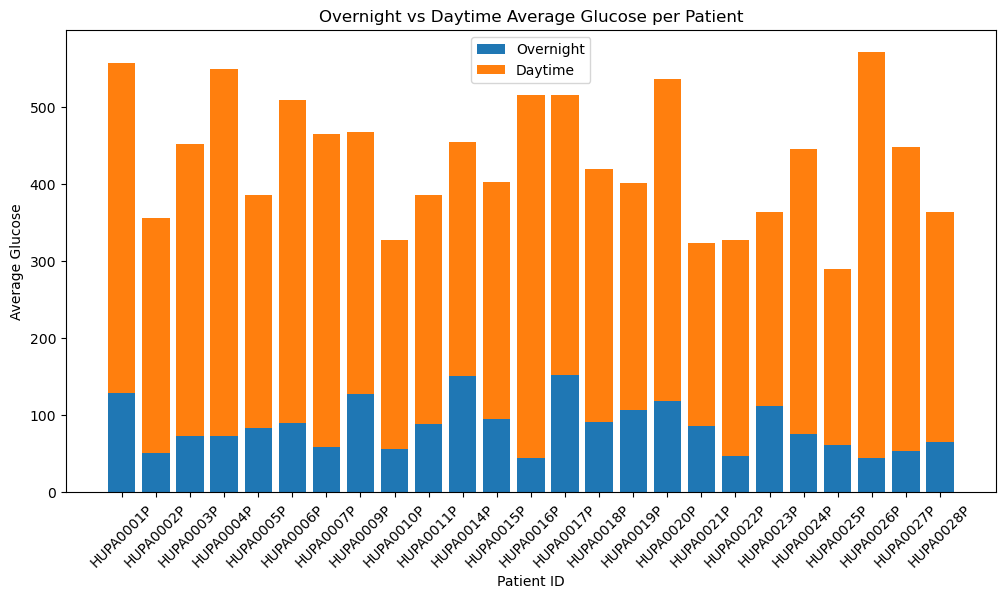

In [226]:
# pivot_df.plot(x='patient_id', y=['overnight_avg_glucose', 'daytime_avg_glucose'], kind='bar', figsize=(12,6))
# #plt.plot(pivot_df['patient_id'],[pivot_df['overnight_avg_glucose'], pivot_df['daytime_avg_glucose']],kind='bar',label="Glucose",marker="o")
# plt.ylabel('Average Glucose (mg/dL)')
# plt.xlabel('Overnight vs DayTime average Glucose per Patient')
# plt.xticks(rotation=45)
# plt.grid(axis='y',linestyle="--",alpha=0.6)
# plt.show()

plt.figure(figsize=(12,6))
plt.bar(pivot_df['patient_id'], pivot_df['overnight_avg_glucose'], label='Overnight')
plt.bar(pivot_df['patient_id'], pivot_df['daytime_avg_glucose'], bottom=pivot_df['overnight_avg_glucose'], label='Daytime')
plt.xlabel("Patient ID")
plt.ylabel("Average Glucose")
plt.title("Overnight vs Daytime Average Glucose per Patient")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [161]:
overnight_df = patients_df.loc[(patients_df['time'].dt.hour.between(0,5)),['patient_id','time','glucose']]
overnight_df
#overnight_df.count()


,patient_id,time,glucose
64,HUPA0001P,2018-06-14 00:00:00,117.0
65,HUPA0001P,2018-06-14 00:05:00,158.0
66,HUPA0001P,2018-06-14 00:10:00,160.0
67,HUPA0001P,2018-06-14 00:15:00,126.0
68,HUPA0001P,2018-06-14 00:20:00,164.0
...,...,...,...
309311,HUPA0028P,2022-05-18 05:35:00,126.7
309312,HUPA0028P,2022-05-18 05:40:00,125.3
309313,HUPA0028P,2022-05-18 05:45:00,124.0
309314,HUPA0028P,2022-05-18 05:50:00,123.0


In [181]:
daytime_df = patients_df.loc[(patients_df['time'].dt.hour.between(6,23)),['patient_id','time','glucose']]
daytime_df
daytime_df.count()


,patient_id,time,glucose
0,HUPA0001P,False,173.471726
1,HUPA0001P,True,184.045984
2,HUPA0002P,False,104.045960
3,HUPA0002P,True,116.593763
4,HUPA0003P,False,150.478098
5,HUPA0003P,True,140.894037
6,HUPA0004P,False,142.418056
7,HUPA0004P,True,192.946656
8,HUPA0005P,False,127.663462
9,HUPA0005P,True,154.116427


In [250]:
#Adding extra date column while grouping for daytime
daytime_df = patients_df.assign(date=patients_df['time'].dt.date,is_daytime = patients_df['time'].dt.hour.between(6,23)).groupby(['patient_id','date','is_daytime'])['glucose'].mean().reset_index()
daytime_df
daytime_df.count()
#Delete all rows having is_daytime == False
daytime_df=daytime_df[daytime_df2['is_daytime']==True]
daytime_df=daytime_df.rename(columns={'glucose':'daytime_avg_glucose'})
daytime_df.count()
daytime_df

,patient_id,date,is_daytime,daytime_avg_glucose
0,HUPA0001P,2018-06-13,True,169.625000
2,HUPA0001P,2018-06-14,True,163.814815
4,HUPA0001P,2018-06-15,True,138.754630
6,HUPA0001P,2018-06-16,True,155.916667
8,HUPA0001P,2018-06-17,True,170.814815
...,...,...,...,...
2155,HUPA0028P,2022-05-14,True,134.509259
2157,HUPA0028P,2022-05-15,True,142.199074
2159,HUPA0028P,2022-05-16,True,149.541667
2161,HUPA0028P,2022-05-17,True,159.785185


In [251]:
#Adding extra column while grouping for overnight
overnight_df= patients_df.assign(date=patients_df['time'].dt.date,is_overnight = patients_df['time'].dt.hour.between(0,5)).groupby(['patient_id','date','is_overnight'])['glucose'].mean().reset_index()
overnight_df
overnight_df=overnight_df[overnight_df2['is_overnight']==True]
overnight_df = overnight_df.rename(columns={'glucose':'overnight_avg_glucose'})
overnight_df.count()
overnight_df

,patient_id,date,is_overnight,overnight_avg_glucose
2,HUPA0001P,2018-06-14,True,128.916667
4,HUPA0001P,2018-06-15,True,255.027778
6,HUPA0001P,2018-06-16,True,152.861111
8,HUPA0001P,2018-06-17,True,130.243056
10,HUPA0001P,2018-06-18,True,166.888889
...,...,...,...,...
2155,HUPA0028P,2022-05-14,True,109.472222
2157,HUPA0028P,2022-05-15,True,168.395833
2159,HUPA0028P,2022-05-16,True,123.944444
2161,HUPA0028P,2022-05-17,True,167.750000


In [252]:
#join two df
result_df = pd.merge(daytime_df, overnight_df, on = ['patient_id','date'], how="inner") #,suffixes=('_daytime_avg_','_overnight_avg_'))
result_df.count()
result_df
result_df.columns

Index(['patient_id', 'date', 'is_daytime', 'daytime_avg_glucose',
       'is_overnight', 'overnight_avg_glucose'],
      dtype='object')

In [1]:
plt.figure(figsize=(12,6))
plt.bar(result_df['patient_id'], result_df['overnight_avg_glucose'], label='Overnight')
plt.bar(result_df['patient_id'], result_df['daytime_avg_glucose'], bottom=pivot_df['overnight_avg_glucose'], label='Daytime')
plt.xlabel("Patient ID")
plt.ylabel("Average Glucose")
plt.title("Overnight vs Daytime Average Glucose per Patient")
plt.xticks(rotation=45)
plt.legend()
plt.show()

NameError: name 'plt' is not defined